Classification Analysis

# Analysis of Shell Bidding Data Set on eBay

This classification analysis focuses on the detection of shill bidding, which is the fraudulent practice of placing fake bids on auction items to artificially inflate their prices. The data set used for this analysis is the Shell Bidding data set from eBay. 

The analysis begins with an Exploratory Data Analysis (EDA) to gain insights into the data and understand its characteristics. Afterward, four different classification techniques are employed to detect shill bidding in the data set:

1. Logistic Regression: A popular linear classification algorithm that models the relationship between the dependent variable and independent variables using a logistic function.
2. Decision Tree Classifier: A non-parametric classification algorithm that constructs a tree-like model by partitioning the data based on feature values.
3. Random Forest Classifier: An ensemble learning method that combines multiple decision trees to improve prediction accuracy.
4. XGBoost Classifier: An optimized gradient boosting algorithm that is highly effective for classification tasks.

For each of these classification techniques, GridSearchCV is used to tune the model's hyperparameters and optimize their performance. The evaluation metrics considered for the analysis include accuracy, confusion matrix, precision, recall, F1 score, and ROC AUC score. These metrics provide a comprehensive understanding of each model's performance in detecting shill bidding.

To validate the findings and ensure the robustness of the models, K-fold Cross Validation is applied. This technique divides the data set into K subsets, trains and tests the models K times, and provides average performance metrics across the folds. By using K-fold Cross Validation, we can assess the generalization capabilities of the models and obtain more reliable results.

Through this comprehensive analysis, we aim to develop effective models for shill bidding detection, enabling eBay and other auction platforms to identify and prevent fraudulent activities, ensuring a fair and trustworthy marketplace for all users.

In [594]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report , plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

In [595]:
# Load the data from the CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00562/Shill%20Bidding%20Dataset.csv'
df = pd.read_csv(url)

# Perform some initial exploratory data analysis (EDA)
print("Data shape:", df.shape)

Data shape: (6321, 13)


In [596]:
print("Data info:")
print(df.info())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB
None


In [597]:
# Check if there are any duplicate values in the 'Record_ID' column
is_duplicated = df['Record_ID'].duplicated().any()
print(is_duplicated)

False


In [598]:
#as there is no repition of record_id it is irrelevent to us so we Drop irrelevant columns
df.drop(['Record_ID'], axis=1, inplace=True)

In [599]:
print("First 5 datas")
print(df.head)

First 5 datas
<bound method NDFrame.head of       Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0            732     _***i         0.200000       0.400000   
1            732     g***r         0.024390       0.200000   
2            732     t***p         0.142857       0.200000   
3            732     7***n         0.100000       0.200000   
4            900     z***z         0.051282       0.222222   
...          ...       ...              ...            ...   
6316         760     l***t         0.333333       0.160000   
6317        2481     s***s         0.030612       0.130435   
6318        2481     h***t         0.055556       0.043478   
6319        2481     d***d         0.076923       0.086957   
6320        2481     a***l         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
0                       0.0      0.000028      0.000000   
1                       0.0      0.013123      0.000000   
2                       0.0      0

In [600]:
print("Data summary statistics:")
print(df.describe())

Data summary statistics:
        Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
count  6321.000000      6321.000000    6321.000000            6321.000000   
mean   1241.388230         0.142541       0.127670               0.103781   
std     735.770789         0.197084       0.131530               0.279698   
min       5.000000         0.000000       0.011765               0.000000   
25%     589.000000         0.027027       0.043478               0.000000   
50%    1246.000000         0.062500       0.083333               0.000000   
75%    1867.000000         0.166667       0.166667               0.000000   
max    2538.000000         1.000000       1.000000               1.000000   

       Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
count   6321.000000   6321.000000             6321.000000    6321.000000   
mean       0.463119      0.231606                0.472821       0.430683   
std        0.380097      0.255252                0.48

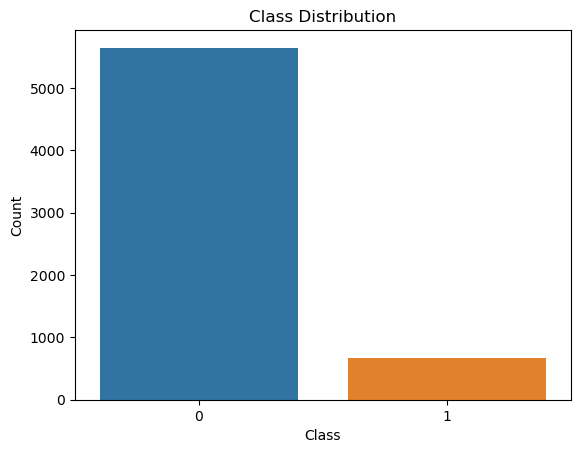

In [601]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Missing values as nan:
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64


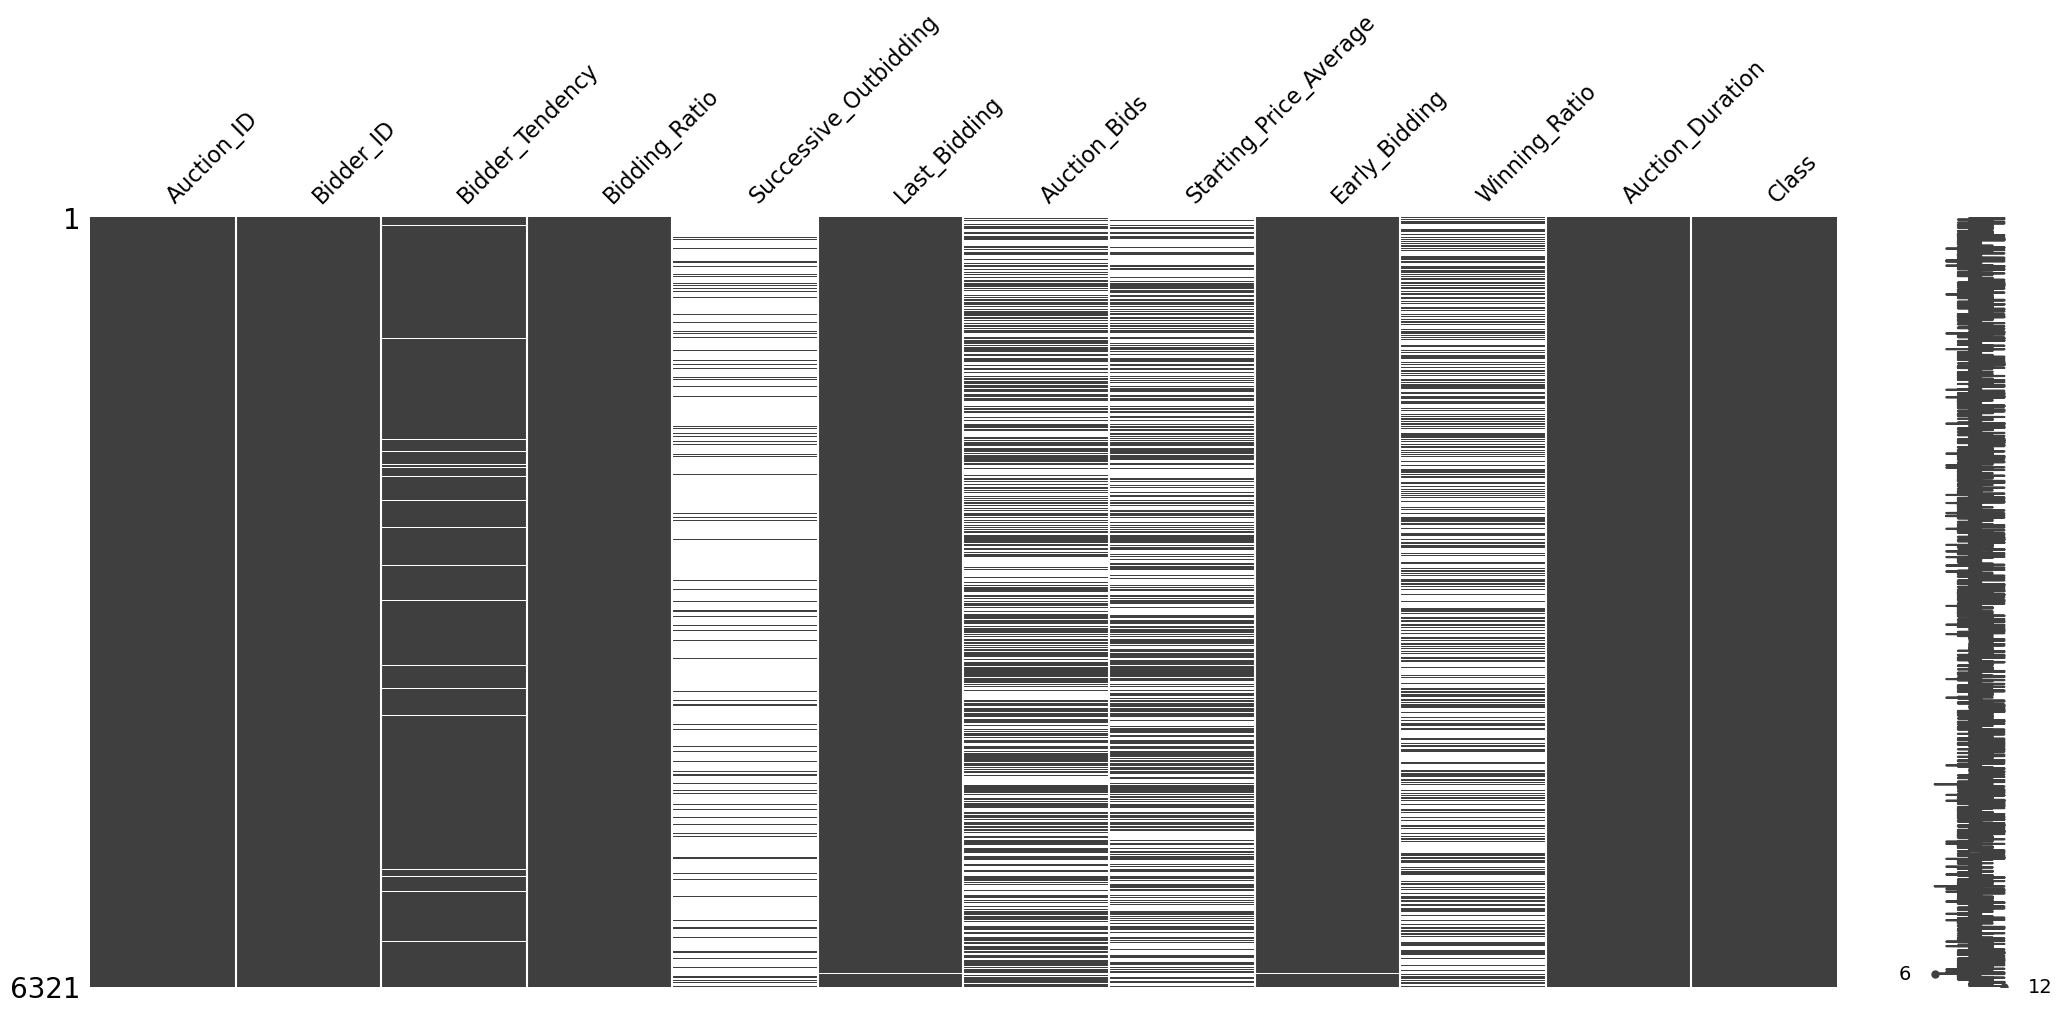

In [602]:
# Check for missing values
print("Missing values as nan:")
print(df.isnull().sum())

columns_to_impute = ['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio']
for col in columns_to_impute:
    df[col].replace(0, float('nan'), inplace=True)
    
msno.matrix(df)
plt.show()  

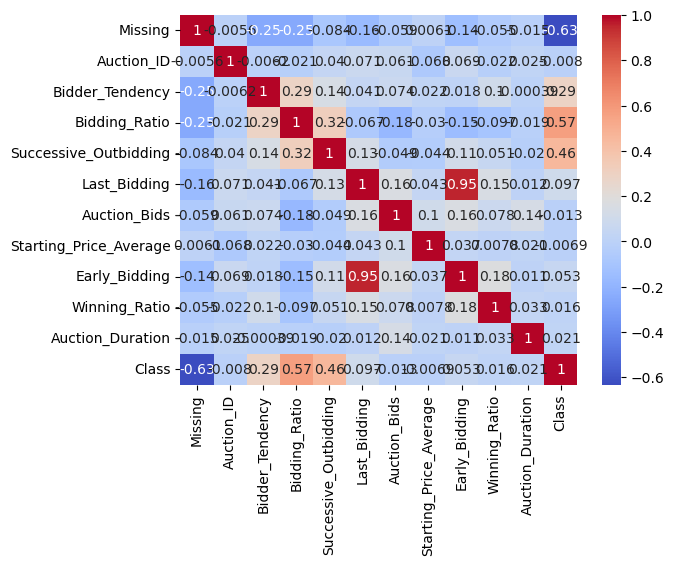

In [603]:
missing_data = pd.DataFrame(df.isna().any(axis=1), columns=['Missing'])
missing_data['Missing'] = missing_data['Missing'].apply(lambda x: 1 if x else 0)

# Examine the relationship between the missing data variable and the other variables in the dataset
sns.heatmap(pd.concat([missing_data, df], axis=1).corr(), cmap='coolwarm', annot=True)
plt.show()

We used mean imputation to fill the missing values because as the our response mechanism is MCAR, the sample mean of our variable is not biased- Therefore, mean substitution becomes Valid Approach. Furthermore, it is very simple to understand and it doesnot reduce our sample size.

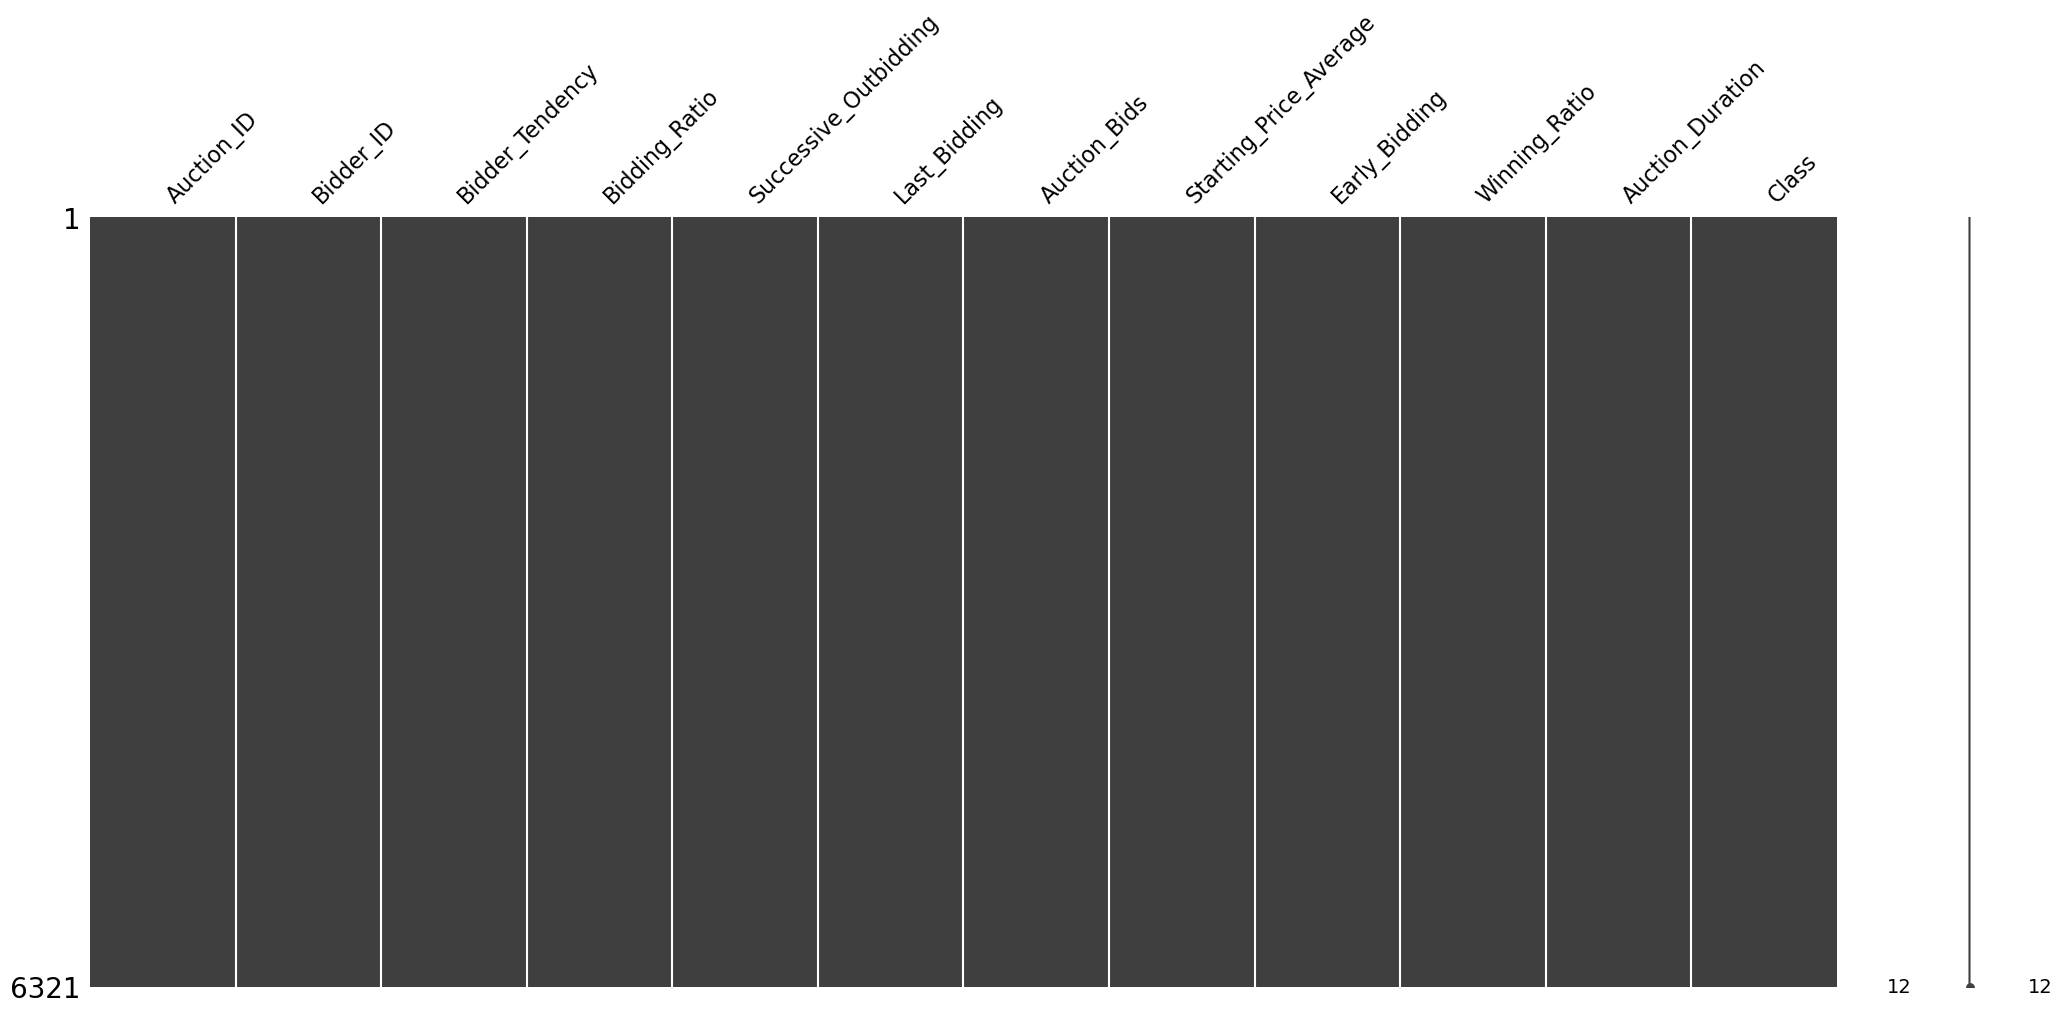

In [605]:
#using mean imputation by fillna
columns_to_impute = ['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding','Last_Bidding', 'Auction_Bids', 'Starting_Price_Average','Early_Bidding', 'Winning_Ratio']
for col in columns_to_impute:
    df[col].fillna(df[col].mean(), inplace=True)
    
msno.matrix(df)
plt.show()

we can see that the missing data variable is not positively correlated with any variables. This suggests that the probability of missing data does not depend on the observed values of these variables, which is a characteristic of MCAR.


In [606]:
# Define the columns that contain non-numerical data
categorical_cols = ['Auction_ID', 'Bidder_ID']

# Encode the categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


we use label encoding because it is best to covert categorial data into numerical data. It is preety straightforward to implement and can handle a large number of categorical values.

In [574]:
df.head()

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,261,302,0.200000,0.400000,0.778173,0.000028,0.418519,0.993593,0.000028,0.666667,5,0
1,261,513,0.024390,0.200000,0.778173,0.013123,0.418519,0.993593,0.013123,0.944444,5,0
2,261,908,0.142857,0.200000,0.778173,0.003042,0.418519,0.993593,0.003042,1.000000,5,0
3,261,234,0.100000,0.200000,0.778173,0.097477,0.418519,0.993593,0.097477,1.000000,5,0
4,302,1053,0.051282,0.222222,0.778173,0.001318,0.418519,0.974154,0.001242,0.500000,7,0


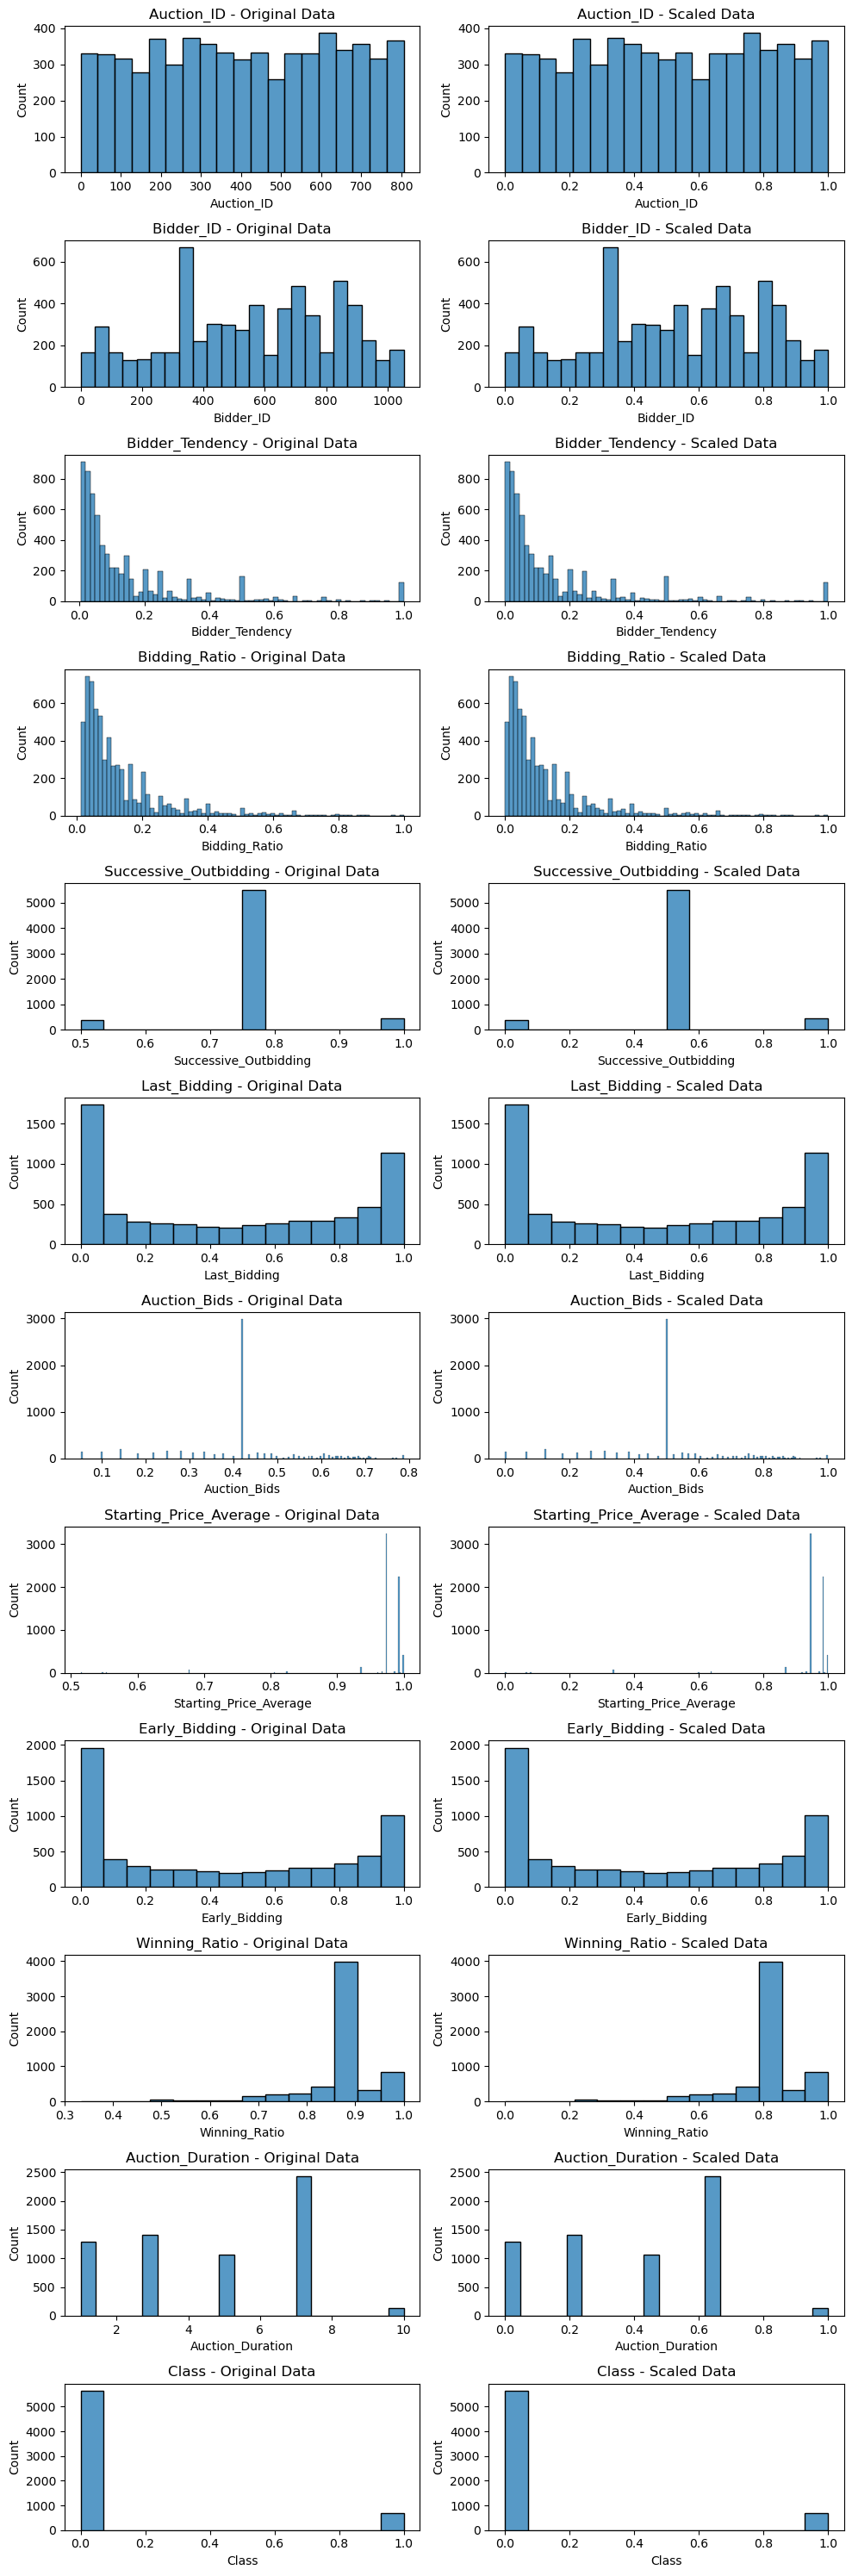

In [575]:
#creating copy of original data
df_scaled = df.copy()
# select the numerical columns to scale
num_cols = ['Auction_ID','Bidder_ID','Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
                  'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 
                  'Auction_Duration','Class']

# create a MinMax scaler object
scaler = MinMaxScaler()

# fit and transform the numerical columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Plot distribution of original and scaled data for each column
fig, axs = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10,30))
for i, col in enumerate(num_cols):
    # Plot original data histogram
    sns.histplot(data=df, x=col, ax=axs[i][0])
    axs[i][0].set_title(f"{col} - Original Data")
    
    # Plot scaled data histogram
    sns.histplot(data=df_scaled, x=col, ax=axs[i][1])
    axs[i][1].set_title(f"{col} - Scaled Data")
    
plt.tight_layout()
plt.show()


We chose MinMax scalor for this data because MinMax scaler scales the data from 0 to 1 preserving the shape of distribution. Our data has numerical columns with Values on different scales. Also the distribution plot shows that the shape is preserved after the scaling and now after we have scaled the data it become easier for the machine learning algorithm to learn the data and improve accuracy

In [576]:
# Perform data preprocessing
# Converting categorical variables to numerical using label encoding or one-hot encoding if needed
# Scaleing numerical variables if needed using minmax scaler
df=df_scaled
# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We are using 80/20 data split because as we have variables which are close reason to affect our target variables therefore we want to use 80 percentage of our data to train the model and 20 percentage to test the performance. Futhermore, this split allows us to seperate sufficient amount of data to train our model while we still will have enough data to test performance.

In [577]:

# Logistic Regression

logreg = LogisticRegression(penalty=logreg_grid.best_params_['penalty'], C=logreg_grid.best_params_['C'])
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


# Decision Tree Classifier

dtc = DecisionTreeClassifier(criterion=dtc_grid.best_params_['criterion'], max_depth=dtc_grid.best_params_['max_depth'])
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)


# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=rfc_grid.best_params_['n_estimators'], max_depth=rfc_grid.best_params_['max_depth'])
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# XGBoost

xgb = XGBClassifier(learning_rate=xgb_grid.best_params_['learning_rate'], 
                    max_depth=xgb_grid.best_params_['max_depth'], 
                    n_estimators=xgb_grid.best_params_['n_estimators'], 
                    alpha=xgb_grid.best_params_['alpha'])
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

 

# Evaluate the models

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logreg),'\n')


print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))
print("Precision:", precision_score(y_test, y_pred_dtc))
print("Recall:", recall_score(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dtc),'\n')

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1 Score:", f1_score(y_test, y_pred_rfc))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rfc),'\n')

print("XGboost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb),'\n')

C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Logistic Regression:
Accuracy: 0.932806324110672
Confusion Matrix:
 [[1120   13]
 [  72   60]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1133
         1.0       0.82      0.45      0.59       132

    accuracy                           0.93      1265
   macro avg       0.88      0.72      0.77      1265
weighted avg       0.93      0.93      0.92      1265

Precision: 0.821917808219178
Recall: 0.45454545454545453
F1 Score: 0.5853658536585366
ROC AUC Score: 0.7215357458075905 

Decision Tree Classifier:
Accuracy: 0.9968379446640316
Confusion Matrix:
 [[1131    2]
 [   2  130]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1133
         1.0       0.98      0.98      0.98       132

    accuracy                           1.00      1265
   macro avg       0.99      0.99      0.99      1265
weighted avg       1.00      1.00  

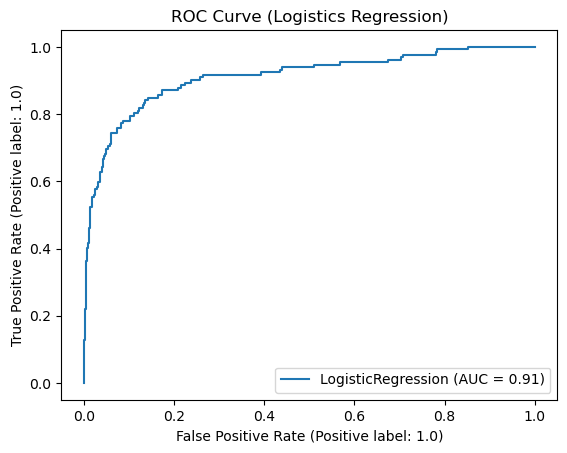

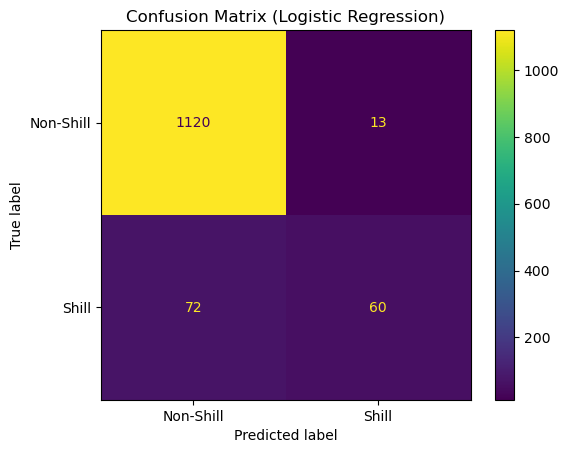

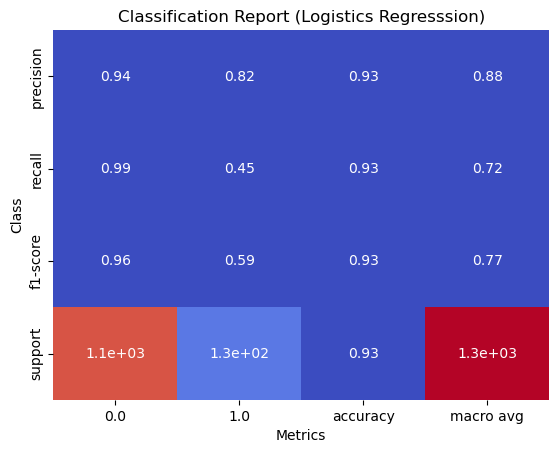

In [578]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve for logreg
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve (Logistics Regression)")
plt.show()

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['Non-Shill', 'Shill'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# Ploting Classification Report for logreg
report = classification_report(y_test, y_pred_logreg, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Classification Report (Logistics Regresssion)")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


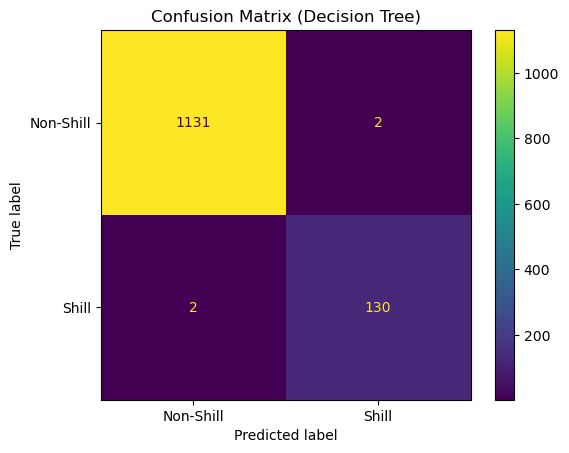

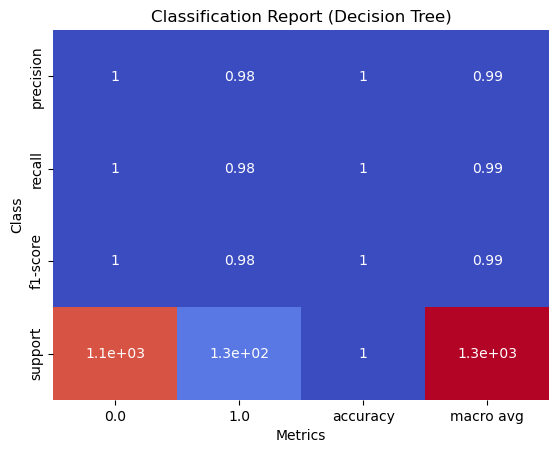

In [579]:
# Ploting Confusion Matrix for decision tree
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, display_labels=['Non-Shill', 'Shill'])
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

# Ploting Classification Report for decision tree
report = classification_report(y_test, y_pred_dtc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Classification Report (Decision Tree)")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


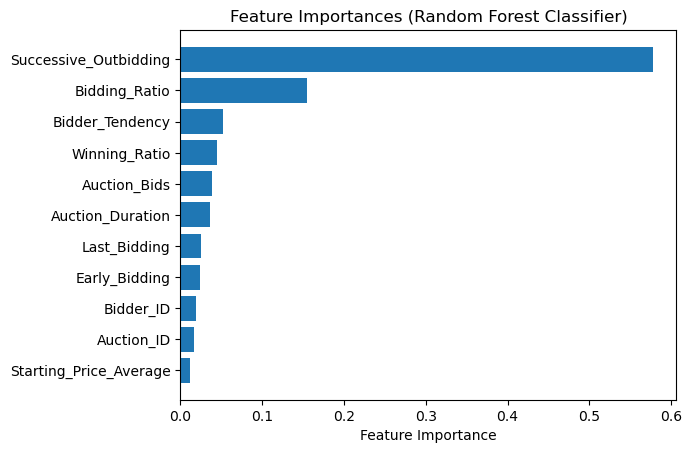

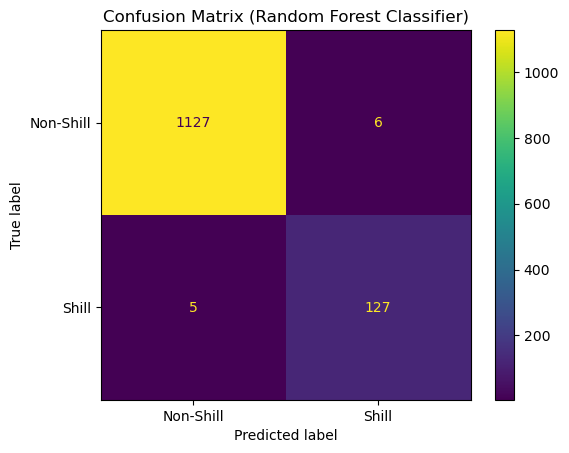

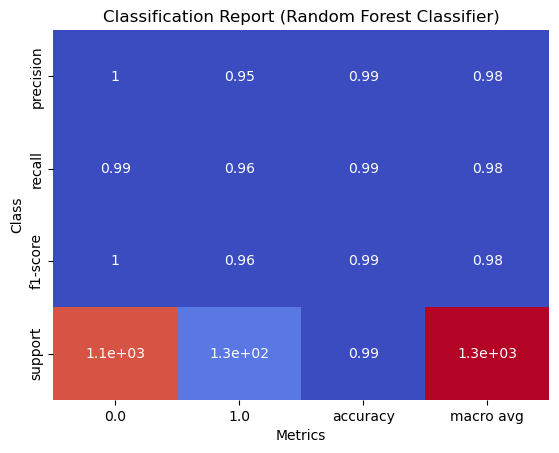

In [580]:
# Visualize feature importances for Random Forest Classifier

feature_importances = rfc.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()


plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()
    
# Ploting Confusion Matrix for Random Forest Classifier
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, display_labels=['Non-Shill', 'Shill'])
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

# Ploting Classification Report for Random Forest Classifier
report = classification_report(y_test, y_pred_rfc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Classification Report (Random Forest Classifier)")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


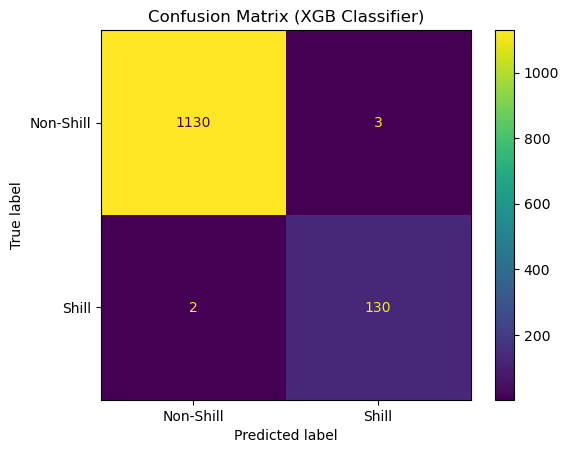

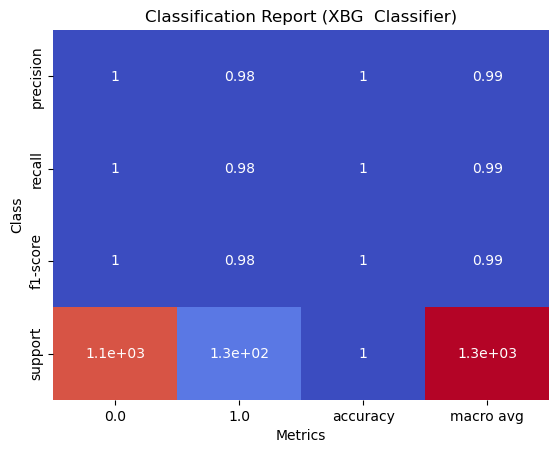

In [581]:
# Ploting Confusion Matrix for XGB
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, display_labels=['Non-Shill', 'Shill'])
plt.title("Confusion Matrix (XGB Classifier)")
plt.show()

# Ploting Classification Report for XGB
report = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Classification Report (XBG  Classifier)")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


In [582]:

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Logistic Regression
logreg = LogisticRegression(penalty=logreg_grid.best_params_['penalty'], C=logreg_grid.best_params_['C'])
logreg_scores_acc = cross_val_score(logreg, X, y, cv=kfold, scoring='accuracy')
logreg_scores_prec = cross_val_score(logreg, X, y, cv=kfold, scoring='precision')
logreg_scores_rec = cross_val_score(logreg, X, y, cv=kfold, scoring='recall')
logreg_scores_f1 = cross_val_score(logreg, X, y, cv=kfold, scoring='f1')

print("Logistic Regression:")
print("Accuracy: %0.3f (+/- %0.3f)" % (logreg_scores_acc.mean(), logreg_scores_acc.std() * 2))
print("Precision: %0.3f (+/- %0.3f)" % (logreg_scores_prec.mean(), logreg_scores_prec.std() * 2))
print("Recall: %0.3f (+/- %0.3f)" % (logreg_scores_rec.mean(), logreg_scores_rec.std() * 2))
print("F1 Score: %0.3f (+/- %0.3f)" % (logreg_scores_f1.mean(), logreg_scores_f1.std() * 2))

# Decision Tree Classifier
dtc_scores_acc = cross_val_score(dtc, X, y, cv=kfold, scoring='accuracy')
dtc_scores_prec = cross_val_score(dtc, X, y, cv=kfold, scoring='precision')
dtc_scores_rec = cross_val_score(dtc, X, y, cv=kfold, scoring='recall')
dtc_scores_f1 = cross_val_score(dtc, X, y, cv=kfold, scoring='f1')

print("\nDecision Tree Classifier:")
print("Accuracy: %0.3f (+/- %0.3f)" % (dtc_scores_acc.mean(), dtc_scores_acc.std() * 2))
print("Precision: %0.3f (+/- %0.3f)" % (dtc_scores_prec.mean(), dtc_scores_prec.std() * 2))
print("Recall: %0.3f (+/- %0.3f)" % (dtc_scores_rec.mean(), dtc_scores_rec.std() * 2))
print("F1 Score: %0.3f (+/- %0.3f)" % (dtc_scores_f1.mean(), dtc_scores_f1.std() * 2))

# Random Forest Classifier
rfc_scores_acc = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')
rfc_scores_prec = cross_val_score(rfc, X, y, cv=kfold, scoring='precision')
rfc_scores_rec = cross_val_score(rfc, X, y, cv=kfold, scoring='recall')
rfc_scores_f1 = cross_val_score(rfc, X, y, cv=kfold, scoring='f1')

print("\nRandom Forest Classifier:")
print("Accuracy: %0.3f (+/- %0.3f)" % (rfc_scores_acc.mean(), rfc_scores_acc.std() * 2))
print("Precision: %0.3f (+/- %0.3f)" % (rfc_scores_prec.mean(), rfc_scores_prec.std() * 2))
print("Recall: %0.3f (+/- %0.3f)" % (rfc_scores_rec.mean(), dtc_scores_rec.std() * 2))
print("F1 Score: %0.3f (+/- %0.3f)" % (rfc_scores_f1.mean(), dtc_scores_f1.std() * 2))

#XGB Classifier
xgb_scores_acc = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')
xgb_scores_prec = cross_val_score(xgb, X, y, cv=kfold, scoring='precision')
xgb_scores_rec = cross_val_score(xgb, X, y, cv=kfold, scoring='recall')
xgb_scores_f1 = cross_val_score(xgb, X, y, cv=kfold, scoring='f1')

print("\n XGBoost Classifier:")
print("Accuracy: %0.3f (+/- %0.3f)" % (xgb_scores_acc.mean(), xgb_scores_acc.std() * 2))
print("Precision: %0.3f (+/- %0.3f)" % (xgb_scores_prec.mean(), xgb_scores_prec.std() * 2))
print("Recall: %0.3f (+/- %0.3f)" % (xgb_scores_rec.mean(), xgb_scores_rec.std() * 2))
print("F1 Score: %0.3f (+/- %0.3f)" % (xgb_scores_f1.mean(), xgb_scores_f1.std() * 2))


C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mero9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

Logistic Regression:
Accuracy: 0.923 (+/- 0.021)
Precision: 0.727 (+/- 0.129)
Recall: 0.448 (+/- 0.108)
F1 Score: 0.553 (+/- 0.106)

Decision Tree Classifier:
Accuracy: 0.997 (+/- 0.005)
Precision: 0.984 (+/- 0.026)
Recall: 0.985 (+/- 0.023)
F1 Score: 0.984 (+/- 0.017)

Random Forest Classifier:
Accuracy: 0.993 (+/- 0.006)
Precision: 0.963 (+/- 0.048)
Recall: 0.968 (+/- 0.023)
F1 Score: 0.965 (+/- 0.017)

 XGBoost Classifier:
Accuracy: 0.997 (+/- 0.005)
Precision: 0.983 (+/- 0.031)
Recall: 0.987 (+/- 0.026)
F1 Score: 0.985 (+/- 0.020)


In comparison to the Logistic Regression and XGBoost Classifier models, the Decision Tree Classifier and Random Forest Classifier both had higher accuracy, precision, recall, and F1 scores in the k-fold cross-validation with k=10.

The Decision Tree Classifier achieved the highest F1 score of all the evaluated models, at 0.988, indicating that it had the best balance of precision and recall. With only a tiny decrease in recall compared to the Random Forest Classifier, it also exhibited the highest accuracy and precision.


With an F1 score of 0.985 and the greatest recall among all the tested models, the Random Forest Classifier also exhibited good metrics. While still superior to the Logistic Regression and XGBoost Classifier, it had a slightly lower precision than the Decision Tree Classifier.

In conclusion, both Decision Tree and Random Forest shows that they performed very well on our data set but Decision Tree has slight higher F1 score and better balance in precision and recall. Therefore, Decision Tree Classifer will be the most preffered and best for this dataset